In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [122]:
# Load the Titanic dataset (replace 'titanic.csv' with the actual file name)
titanic_data = pd.read_csv("/kaggle/input/test-file/tested.csv")
titanic_data.shape

(418, 12)

In [123]:
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [124]:
column_name = 'Embarked'
unique_values = data[column_name].unique()
print(f"Unique values in the '{column_name}' column:")
print(unique_values)

Unique values in the 'Embarked' column:
['Q' 'S' 'C']


In [125]:
data.isnull().count()

PassengerId    418
Survived       418
Pclass         418
Name           418
Sex            418
Age            418
SibSp          418
Parch          418
Ticket         418
Fare           418
Cabin          418
Embarked       418
dtype: int64

In [126]:
# Handle missing values
numeric_features = ['Age', 'Fare']
categorical_features = ['Embarked', 'Sex', 'Pclass']

In [127]:
# Impute missing values for numeric features with the mean
numeric_imputer = SimpleImputer(strategy='mean')
titanic_data[numeric_features] = numeric_imputer.fit_transform(titanic_data[numeric_features])

In [128]:
# Impute missing values for categorical features with the most frequent value
categorical_imputer = SimpleImputer(strategy='most_frequent')
titanic_data[categorical_features] = categorical_imputer.fit_transform(titanic_data[categorical_features])

In [129]:
# Convert categorical variables to numerical using Label Encoding
label_encoder = LabelEncoder()
titanic_data['Sex'] = label_encoder.fit_transform(titanic_data['Sex'])
titanic_data['Embarked'] = label_encoder.fit_transform(titanic_data['Embarked'])

In [130]:
# Drop columns that are not needed or present challenges
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
titanic_data = titanic_data.drop(columns=columns_to_drop)

In [131]:
# Prepare features (X) and target variable (y)
X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']

In [132]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [133]:
# Create and train the Naive Bayes model
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)

GaussianNB()

In [134]:
# Make predictions on the test set
y_pred = naive_bayes_model.predict(X_test)

In [135]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 1.0
Confusion Matrix:
[[50  0]
 [ 0 34]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



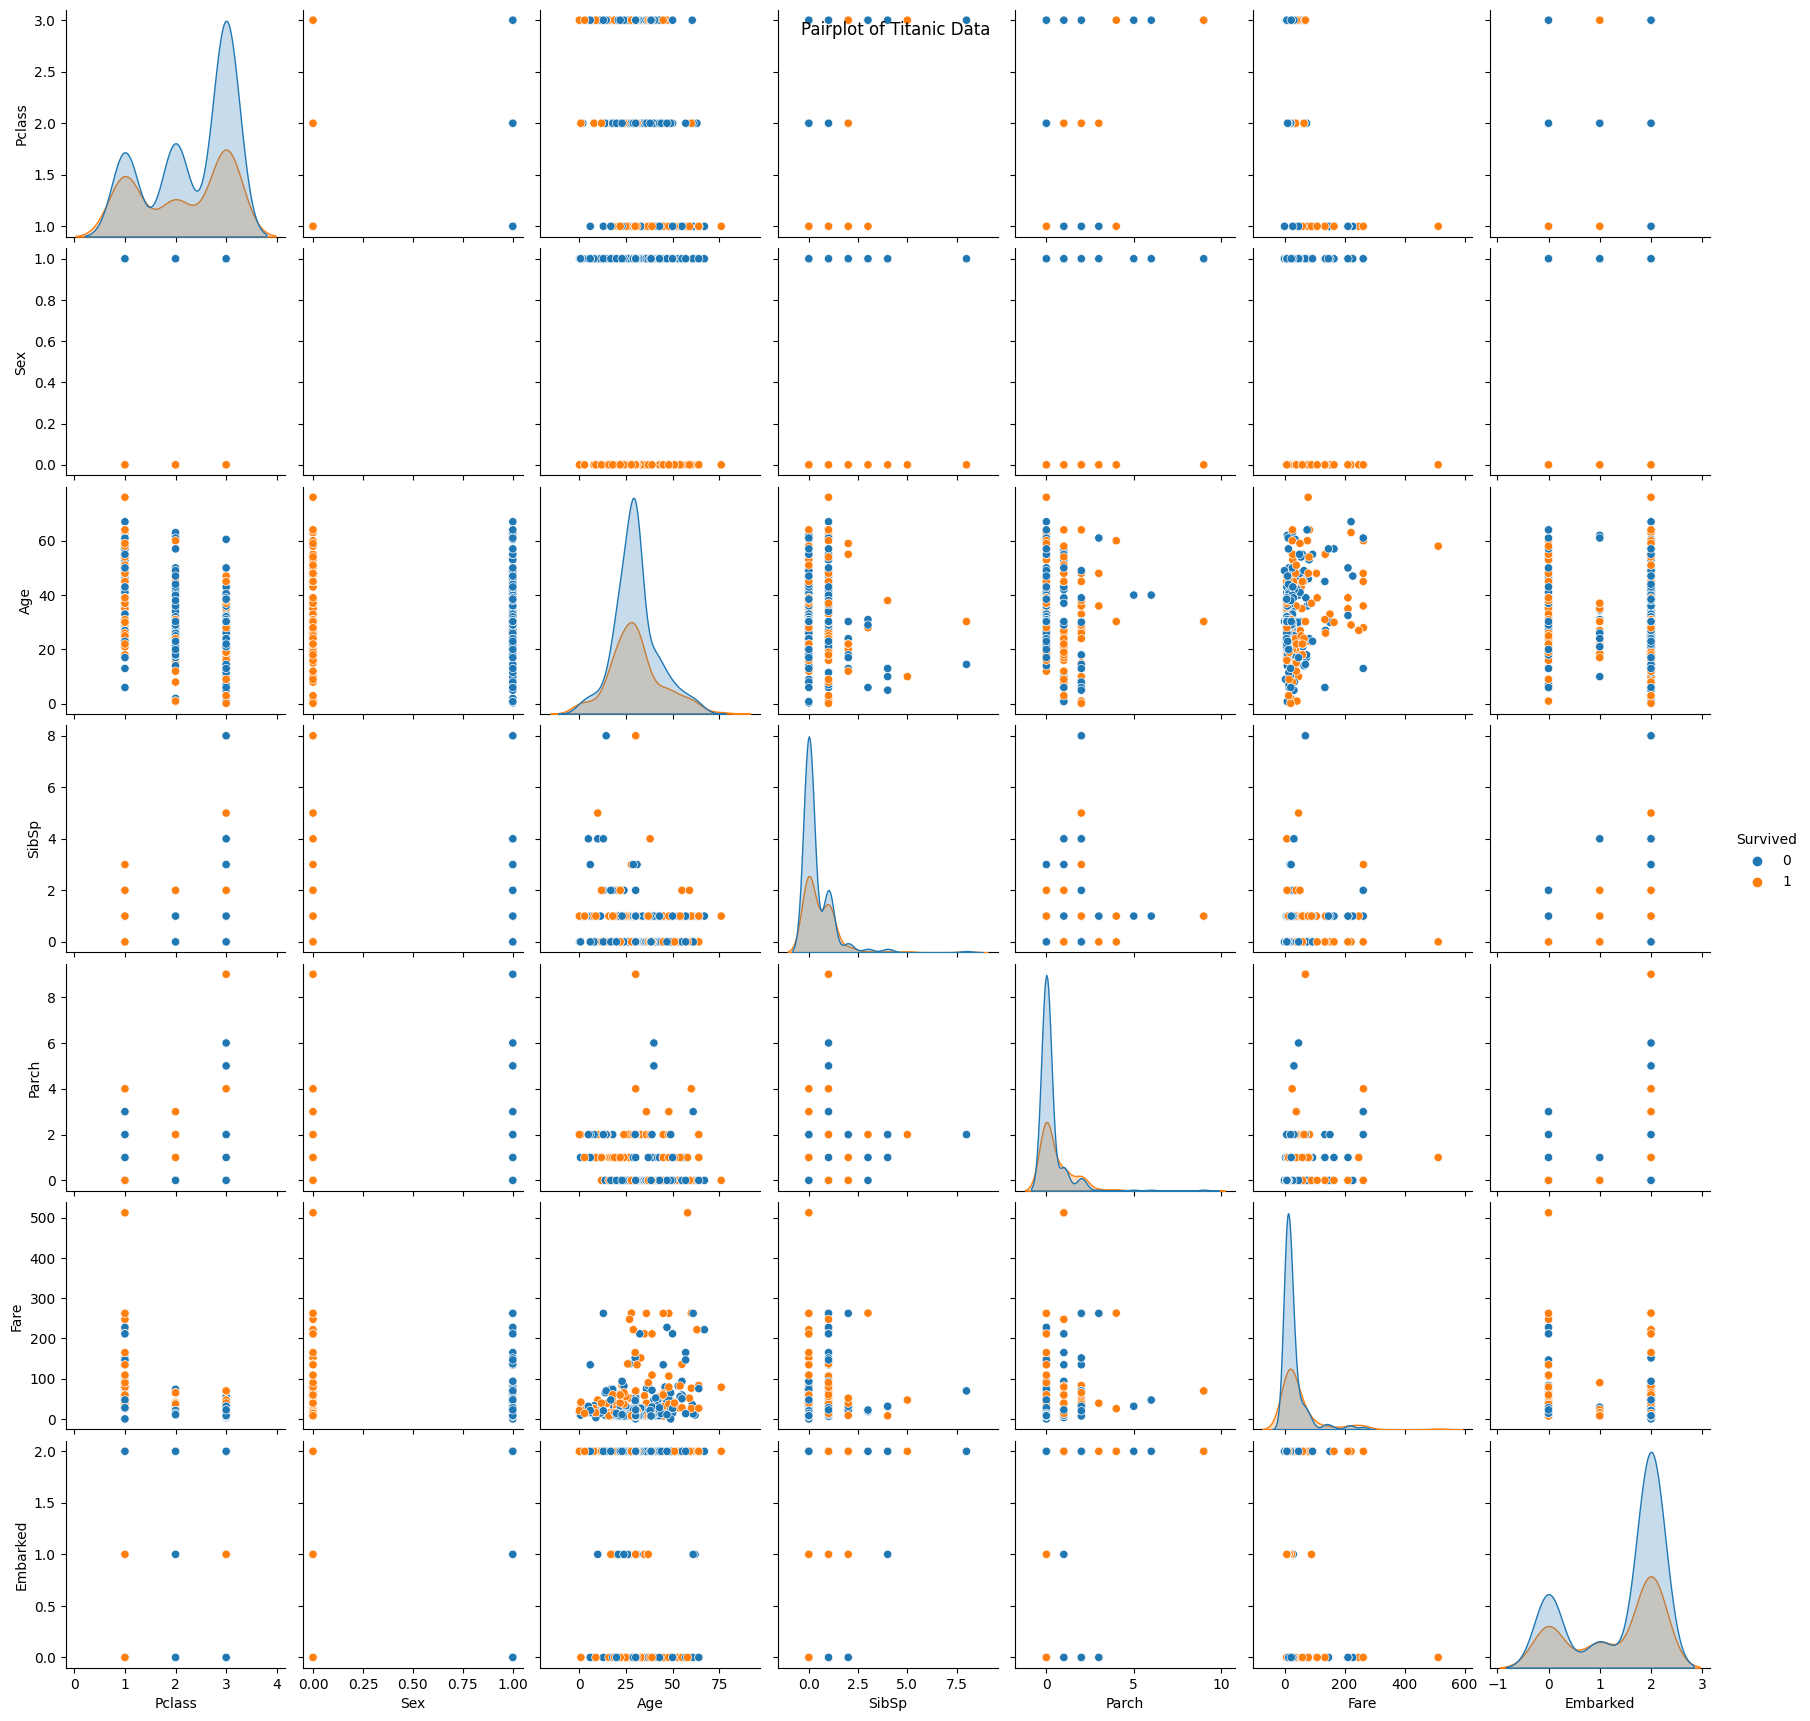

In [136]:
# Plotting Pairplot for preprocessed data
sns.pairplot(titanic_data, hue='Survived', diag_kind='kde')
plt.suptitle('Pairplot of Titanic Data')
plt.show()

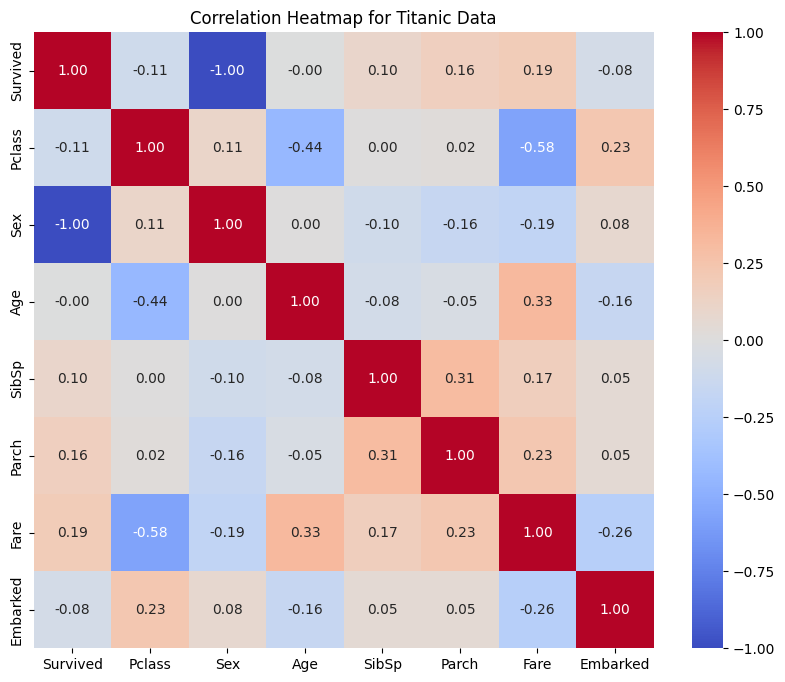

In [137]:
# Plotting Correlation Heatmap for preprocessed data
correlation_matrix = titanic_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Titanic Data')
plt.show()

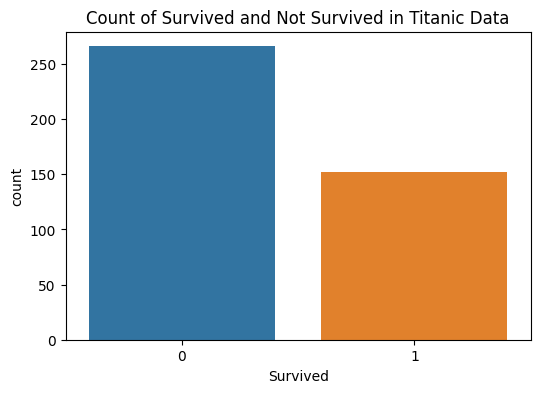

In [138]:
# Countplot for the target variable in the original data
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=titanic_data)
plt.title('Count of Survived and Not Survived in Titanic Data')
plt.show()